In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\yasha\Desktop\Flight_Price_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# checking for null values in the dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# since only 1 null value, it is better to drop it
df.dropna(axis = 0, inplace = True)

- All of the x variables are 'object' datatype except target variable.
- Changing the datatype and extracting useful information

In [7]:
def change_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [8]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_datetime(feature)

C:\Users\yasha\AppData\Local\Temp\ipykernel_11644\2177216459.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col] = pd.to_datetime(df[col])


In [9]:
df['day'] = df['Date_of_Journey'].dt.day
df['month'] = df['Date_of_Journey'].dt.month
df['year'] = df['Date_of_Journey'].dt.year

In [10]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-14 05:50:00,2023-10-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


- Extracting information from arrival_time and dep_time variables

In [11]:
def extract_hr(df, col):
    df[col + '_hour'] = df[col].dt.hour
    df[col +'_minute'] = df[col].dt.minute
    return df.head(3)

In [12]:
extract_hr(df, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-14 05:50:00,2023-10-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [13]:
extract_hr(df, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-14 05:50:00,2023-10-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


- Since information has been extracted, dropping some columns

In [14]:
df.drop(columns=['Arrival_Time', 'Dep_Time'], axis = 1, inplace = True)

## Data Analysis
- Making categories based on time and checking the flight departure time based ont he categories.
- Finding out what is the most preffered time of the customers.

In [15]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=12):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

<Axes: >

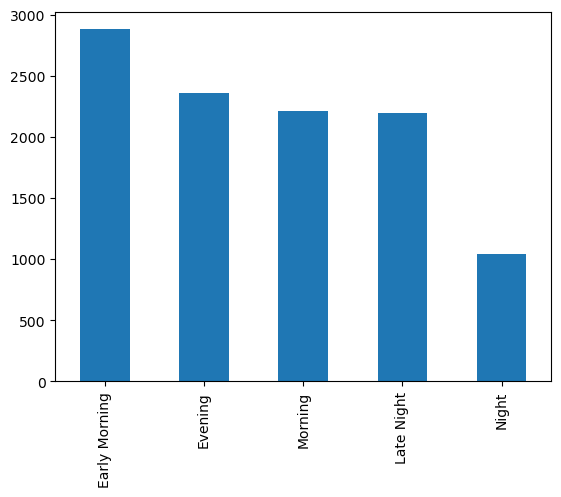

In [16]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

- Most preffered time is early morning and least preffered time is night.

###  Preprocessing the 'Duration' columns
- Finding the total time taken by flight in 'minutes'.

In [17]:
def total_time(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [18]:
df['Duration'] = df['Duration'].apply(total_time)

In [19]:
df['Duration_hrs'] = df['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [20]:
df['Duration_min'] = df['Duration'].apply(lambda x :int(x.split(' ')[1][0:-1]))

In [21]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


In [22]:
df['Total_mins'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

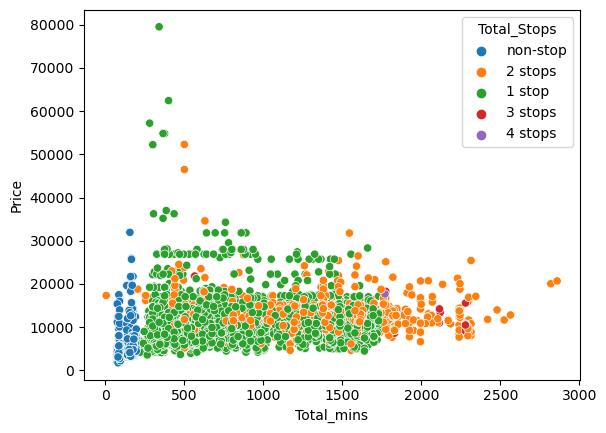

In [23]:
sns.scatterplot(df, x = 'Total_mins', y = 'Price', hue = 'Total_Stops');

- Analysing 'price' and 'duration' with 'no of stops'.
- Non stops flights took the least time on less price.
- More no of stops take more time and are also costly.

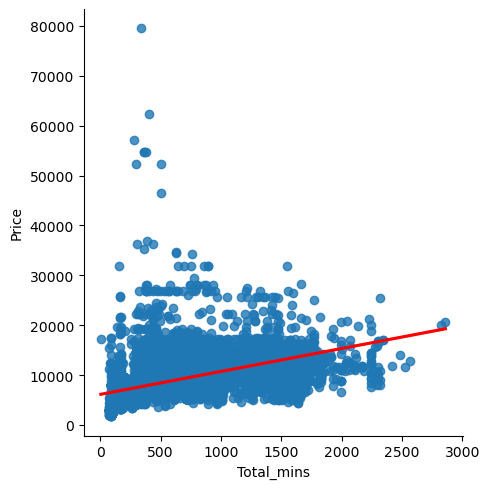

In [24]:
sns.lmplot(df, x = 'Total_mins', y = 'Price', line_kws={'color':'red'})
# price increases with duration

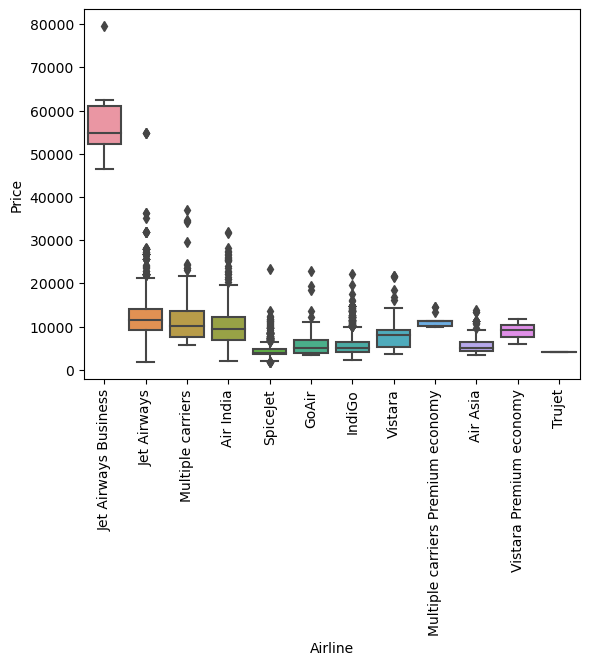

In [25]:
sns.boxplot(data = df.sort_values('Price', ascending = False), x = 'Airline', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

- Checking the Airline company for highest and lowest price.
- Jet Ariways Business has the highest price while Trujet has the lowest price

#### Price based on number of stops

In [26]:
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

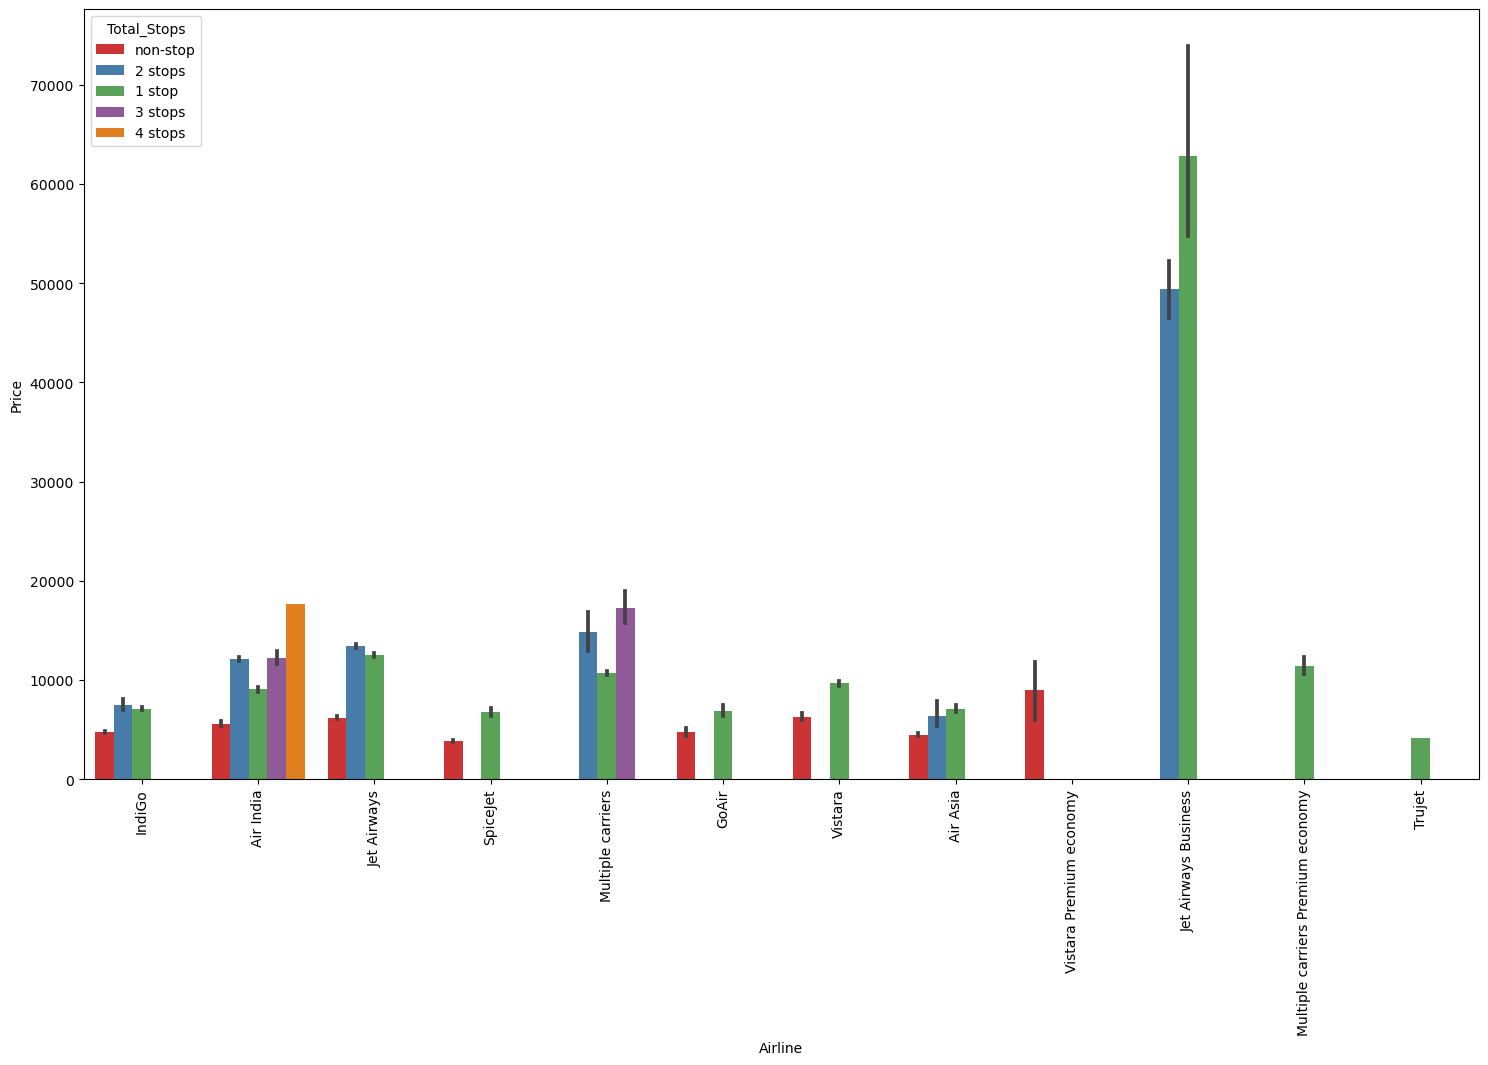

In [27]:
plt.figure(figsize = (18,10))
ax = sns.barplot(x = df['Airline'], y = df['Price'], hue = df['Total_Stops'], palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

- One stops and Two stops Jet Airways Business is having the highest price

#### Source vs Price

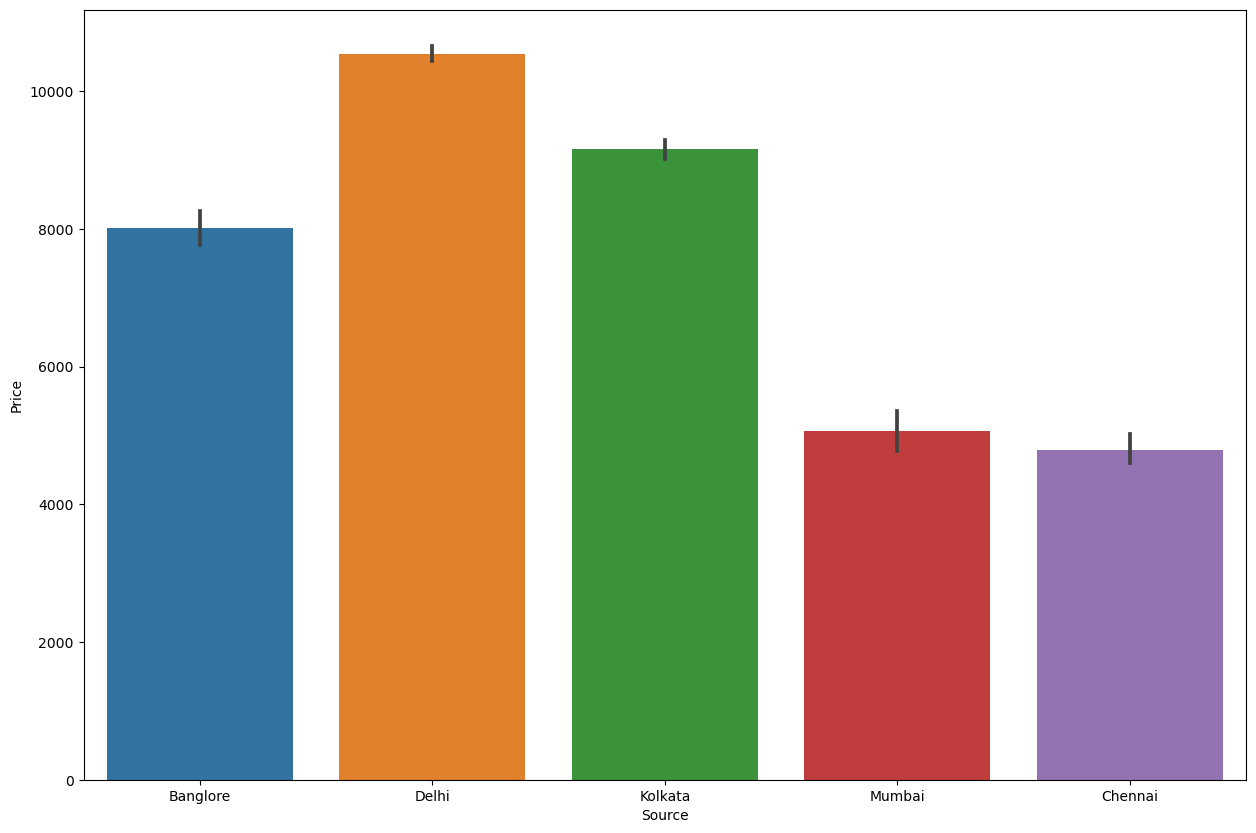

In [28]:
plt.figure(figsize= (15,10))
sns.barplot(x = 'Source', y = 'Price', data = df.sort_values('Price', ascending = False))
plt.show()

#### Destination vs Price

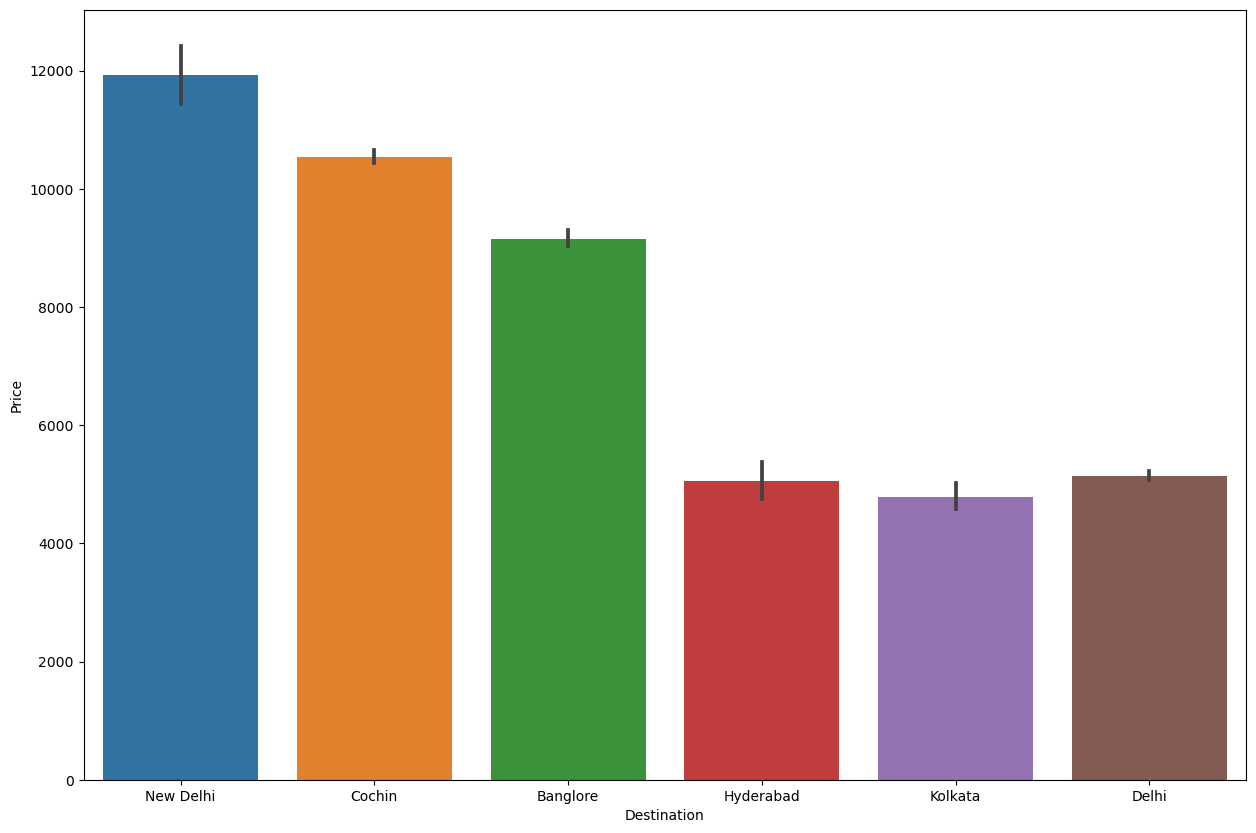

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data = df.sort_values('Price', ascending = False), x = 'Destination', y = 'Price')
plt.show()

In [30]:
for i in df:
    df.replace('New Delhi', 'Delhi', inplace = True)

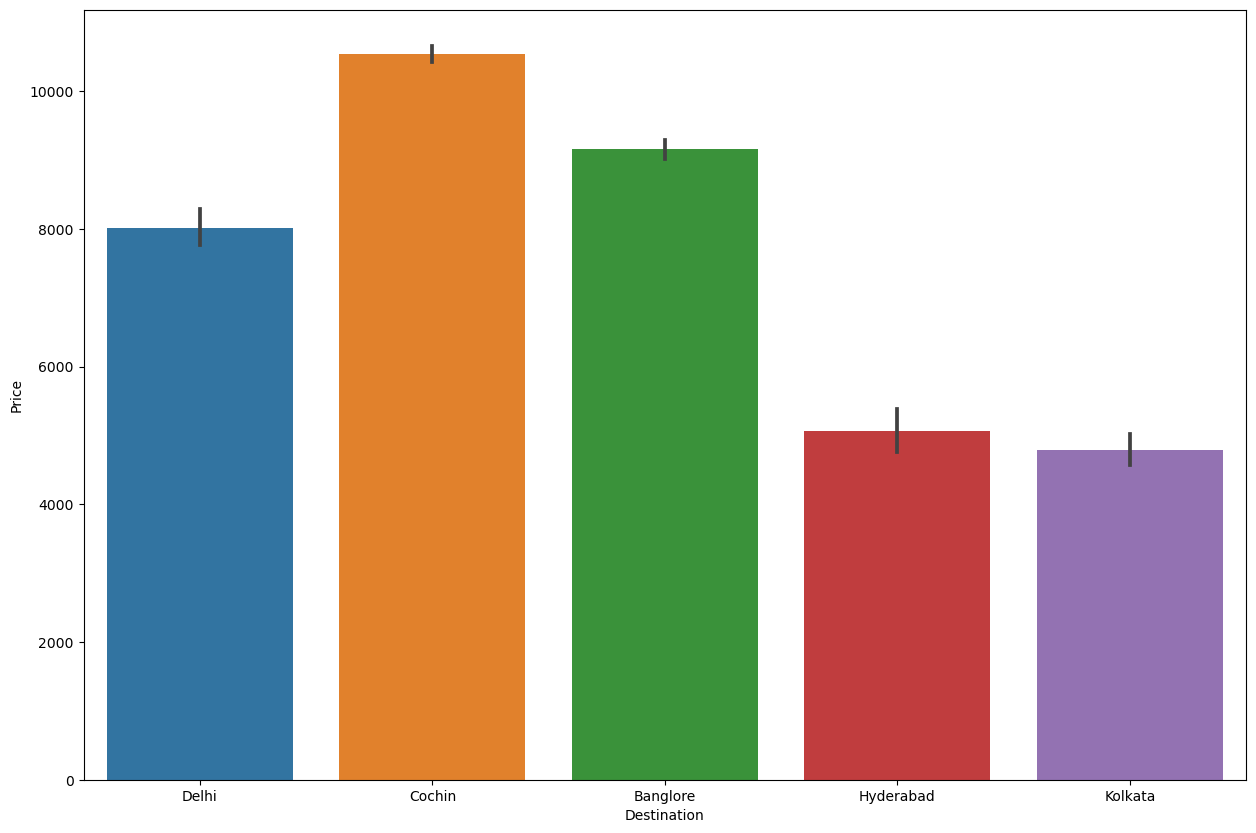

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(data = df.sort_values('Price', ascending = False), x = 'Destination', y = 'Price')
plt.show()

### Changing non numerical data into numerical data
- Applying onehotencoding to categoricals columns

In [32]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy = pd.get_dummies(df['Airline'], drop_first= True)

source_dest_dummy = pd.get_dummies(df[['Source', 'Destination']], drop_first = True)
df = pd.concat([air_dummy, source_dest_dummy, df], axis = 1)

In [34]:
df.drop(['Airline', 'Source', 'Destination'], inplace = True, axis = 1)

In [35]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_min,Total_mins
0,0,0,1,0,0,0,0,0,0,0,...,24,3,2019,22,20,1,10,2,50,170
1,1,0,0,0,0,0,0,0,0,0,...,5,1,2019,5,50,13,15,7,25,445
2,0,0,0,1,0,0,0,0,0,0,...,6,9,2019,9,25,4,25,19,0,1140
3,0,0,1,0,0,0,0,0,0,0,...,5,12,2019,18,5,23,30,5,25,325
4,0,0,1,0,0,0,0,0,0,0,...,3,1,2019,16,50,21,35,4,45,285


In [36]:
[col for col in df.columns if df[col].dtype == 'object']

['Route', 'Duration', 'Additional_Info']

In [37]:
df.drop(columns=['Route', 'Duration', 'Additional_Info'], axis = 1, inplace = True)

In [38]:
x = df.drop(['Price'], axis = 1)
x

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,day,month,year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_min,Total_mins
0,0,0,1,0,0,0,0,0,0,0,...,24,3,2019,22,20,1,10,2,50,170
1,1,0,0,0,0,0,0,0,0,0,...,5,1,2019,5,50,13,15,7,25,445
2,0,0,0,1,0,0,0,0,0,0,...,6,9,2019,9,25,4,25,19,0,1140
3,0,0,1,0,0,0,0,0,0,0,...,5,12,2019,18,5,23,30,5,25,325
4,0,0,1,0,0,0,0,0,0,0,...,3,1,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,4,9,2019,19,55,22,25,2,30,150
10679,1,0,0,0,0,0,0,0,0,0,...,27,4,2019,20,45,23,20,2,35,155
10680,0,0,0,1,0,0,0,0,0,0,...,27,4,2019,8,20,11,20,3,0,180
10681,0,0,0,0,0,0,0,0,0,1,...,3,1,2019,11,30,14,10,2,40,160


In [39]:
x.drop(columns=['Date_of_Journey'], axis = 1, inplace = True)

In [40]:
y = df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [43]:
model = RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

In [127]:
pred = model.predict(x_test)
pred

array([16741.58      ,  6316.98      ,  8858.94      , ...,
        6744.65      , 12512.2905    , 13297.88683333])

In [128]:
from sklearn.metrics import r2_score

In [129]:
r2_score(y_test, pred)

0.813371840967613